<a href="https://colab.research.google.com/github/eashabibi/FML/blob/main/Decision_Tree_Classification_on_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification
* A Supervised learning technique that can be used for both classification and Regression problems, mostly for Classification problems.

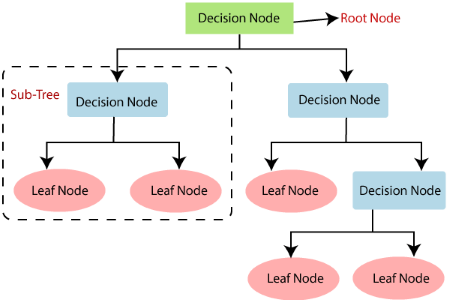
* tree-structured classifier. 
   * internal node -- features(coloumns) of  dataset, 
   * branches represents decision rules 
   * each leaf node represents the outcome.
* Two types nodes which are Decision Node and Leaf Node.
* # Decision nodes
  To make any decision and have multiple branches.
  *

* # Leaf nodes
   Output of those decisions and do not contain any further branches.
###*It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.


**Regression Tree:**

   * For continous quantitavie target variable.

   (a type of numerical data that can take on any value within a specified range or interval.)

   
**EX:** predicting rainfall,revenue,marks,height of a person.


**Classificaction Tree**:

 * For discrete categorical target variables.
(a type of data that take on a finite number of distinct values.)

* These values are usually non-numeric and represent different categories or classes.

**EX:** coin toss possibles outcomes, predicting high or low , win or loss,Healthyor unhealthy.



   
     

**Building classification tree:**

2 types of algorithms


1.ID3 (Itterative Dichotomiser 3)---Entropy used

2.CART (Classification and Regression Tree)--Gini impurity.

**Impurity:** 

A class containing only 1 type of values.

Ex: A basket containing only apples----impurity 0.

Basket containing all types of fruits--impurity not 0.(multiclass classification).

=> DTA use "information gain" to split a node.

=> Gini index or entropy is criteria for calculating information gain.
#Entropy-- 
Measure of randomness or impurity in 
dataset.  It controls how tree decides to split.







## Working:
* To build tree  CART (Classification and Regression Tree) algorithm used.

* Decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.
* To predict class of given dataset, algorithm starts from root node of 
tree. 

**Step-1**: Begin tree with root node, which contains the complete dataset.

**Step-2**: Find best attribute in dataset using Attribute Selection Measure (**ASM**).

**Step-3**: Divide root into subsets that contains possible values for best attributes.

**Step-4**: Generate decision tree node, which contains best attribute.

**Step-5**: Recursively make new decision trees using subsets of dataset created in step -3. Continue process until a stage is reached where you cannot further classify  nodes and called final node as leaf node.

**Attribute Selection Measures**:

The main issue arises that how to select the best attribute for the root node and for sub-nodes. To solve such problems there is a technique which is called as Attribute selection measure or ASM. 
* To select root node, need to find feature that provides most information gain or greatest separation between two classes (pass or fail). 
* **Entropy and Gini Impurity** -- two metrics are used to measure impurity or randomness of dataset.
*  A lower entropy or Gini Impurity indicates greater purity or separation between the classes, and thus more effective split for classification purposes.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
#loading the dataset
data=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# X -- input features for model ( all columns except Outcome column)
#  y --  target variable for model ( Outcome column)

X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

In [14]:
#split the training and testing data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.02,random_state=30)

In [15]:
#feature Scaling  

#normalization of training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#scaling the testing data
X_test = scaler.transform(X_test)
     

#Fitting the model

* "**model = DecisionTreeClassifier()**" :  creates an instance of DecisionTreeClassifier class and assigns it to the variable model. 
* This is essentially creating an empty decision tree model that we can train on data.
* X_train should be a matrix (2-dimensional array)--contains training data's features where each row--a single training example, each column--contains a feature. 
* y_train should be 1-dimensional array --contains corresponding target labels or outcomes for each training example in X_train.
* **model.fit(X_train, y_train)**: to train decision tree model on provided training data X_train , y_train. During training process, decision tree model will analyze provided training data and learn how to make predictions on new, unseen data.
* Makes recursively splitting training data based on values of its features

In [16]:

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

* Once model trained using **fit**, use it to make predictions on new data by calling its predict method, passing in the new data as input. 
* **predict** method will use decision tree -- make predictions for each example in new data, based on tree's learned rules.

In [17]:
y_pred = model.predict(X_test)

In [18]:
model.score(X_train, y_train)
     

1.0

In [19]:
model.score(X_test, y_test)

0.875

In [21]:
#confusion matrix
confusion_matrix(y_test, y_pred)

# Correctly predicted instances = True Negatives (TN) + True Positives (TP)
#   = 13 + 1
#   = 14

array([[13,  2],
       [ 0,  1]])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.33      1.00      0.50         1

    accuracy                           0.88        16
   macro avg       0.67      0.93      0.71        16
weighted avg       0.96      0.88      0.90        16

